In [1]:
import pandas as pd
import numpy as np
import datetime as dt

from spacepy import coordinates as coord
from spacepy.time import Ticktock

In [2]:
base_f_loc = '/storage/silver/stfc_cg/hf832176/data/THEMIS/'

# <center> Read in Data </center>

In [3]:
!ls {base_f_loc}*.pkl

ls: cannot access /storage/silver/stfc_cg/hf832176/data/THEMIS/*.pkl: No such file or directory


In [ ]:
dawn_f2 = pd.read_pickle(base_f_loc+'dawn_f2')
dawn_f2 = pd.read_pickle(base_f_loc+'dusk_f2')

In [4]:
e_levs_sst = pd.read_pickle(base_f_loc+'tha_sst_energy_levels.pkl')
# display(e_levs_sst.T)
e_levs_esa = pd.read_pickle(base_f_loc+'tha_esa_energy_levels.pkl')
# display(e_levs_esa.T)

e_levs = [i for i in e_levs_esa.index[::-1]]+[i for i in e_levs_sst.index]
# display(e_levs)

,31000.0,41000.0,52000.0,65500.0,93000.0,139000.0,203500.0,293000.0,408000.0,561500.0,719500.0,NaN,NaN,NaN,NaN,NaN
eV,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15


,31766.636719,26831.396484,20383.251953,15484.854492,11763.428711,8936.366211,6788.923828,5157.255371,3917.749512,2976.849854,...,83.861748,63.502251,48.474998,36.841000,28.115499,20.844250,15.996750,12.603500,9.210250,7.271250
eV,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31


In [16]:
e_levs2 = e_levs.copy()
e_levs2 = e_levs2[:31] + e_levs2[32:-5]

In [17]:
dawn_f3 = dawn_f2.copy()
# Replacing 0 with np.nan in relevant columns
dawn_f3[dawn_f3.loc[:,dawn_f3.columns[71:]] == 0] = np.nan
# Dropping nans in relevant columns
dawn_f3 = dawn_f3.dropna(subset=dawn_f2.columns[71:])

dusk_f3 = dusk_f2.copy()
# Replacing 0 with np.nan in relevant columns
dusk_f3[dusk_f3.loc[:,dusk_f3.columns[71:]] == 0] = np.nan
# Dropping nans in relevant columns
dusk_f3 = dusk_f3.dropna(subset=dusk_f2.columns[71:])

# <center> Plotting Data </center>

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
import seaborn as sbn

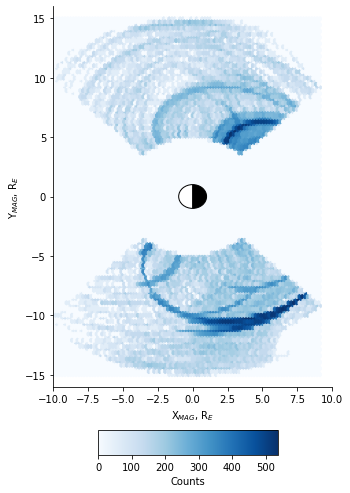

In [35]:
# Spatial distribution of data
fig = plt.figure(figsize=(5,7))
ax1 = plt.subplot(111)

hbp = ax1.hexbin(list(dawn_f2['pos_x_mag'].values)+
           list(dusk_f2['pos_x_mag'].values),
           list(dawn_f2['pos_y_mag'].values)+
           list(dusk_f2['pos_y_mag'].values),
           bins='log',cmap='Blues')

cmap = mpl.cm.get_cmap('Blues',len(dawn_f2)+len(dusk_f2))
norm = mpl.colors.Normalize(vmin=0, vmax=hbp.get_array().max())
cbaxes1 = fig.add_axes([0.25, -0.01, 0.5, 0.05]) 
cb1 = mpl.colorbar.ColorbarBase(cbaxes1, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')

ax1.add_artist(mpl.patches.Wedge((0,0),1,270,90,color='k'))
ax1.add_artist(mpl.patches.Wedge((0,0),1,90,270,color='w',ec='k'))

cb1.set_label('Counts')
ax1.set_ylabel('Y$_{MAG}$, R$_E$')
ax1.set_xlabel('X$_{MAG}$, R$_E$')
ax1.set_ylim(-16,16)
ax1.set_xlim(-10,10)
sbn.despine()

# path = '/home/users/hf832176/My Documents/Coding/themis/Graphs/mag_psd_esa/'
# plt.savefig(fname = path+'data_coverage.pdf',format='pdf',bbox_inches='tight')
# plt.savefig(fname = path+'data_coverage.eps',format='eps',bbox_inches='tight')
# plt.savefig(fname = path+'data_coverage.png',format='png',bbox_inches='tight')

plt.show()
# plt.close(fig)

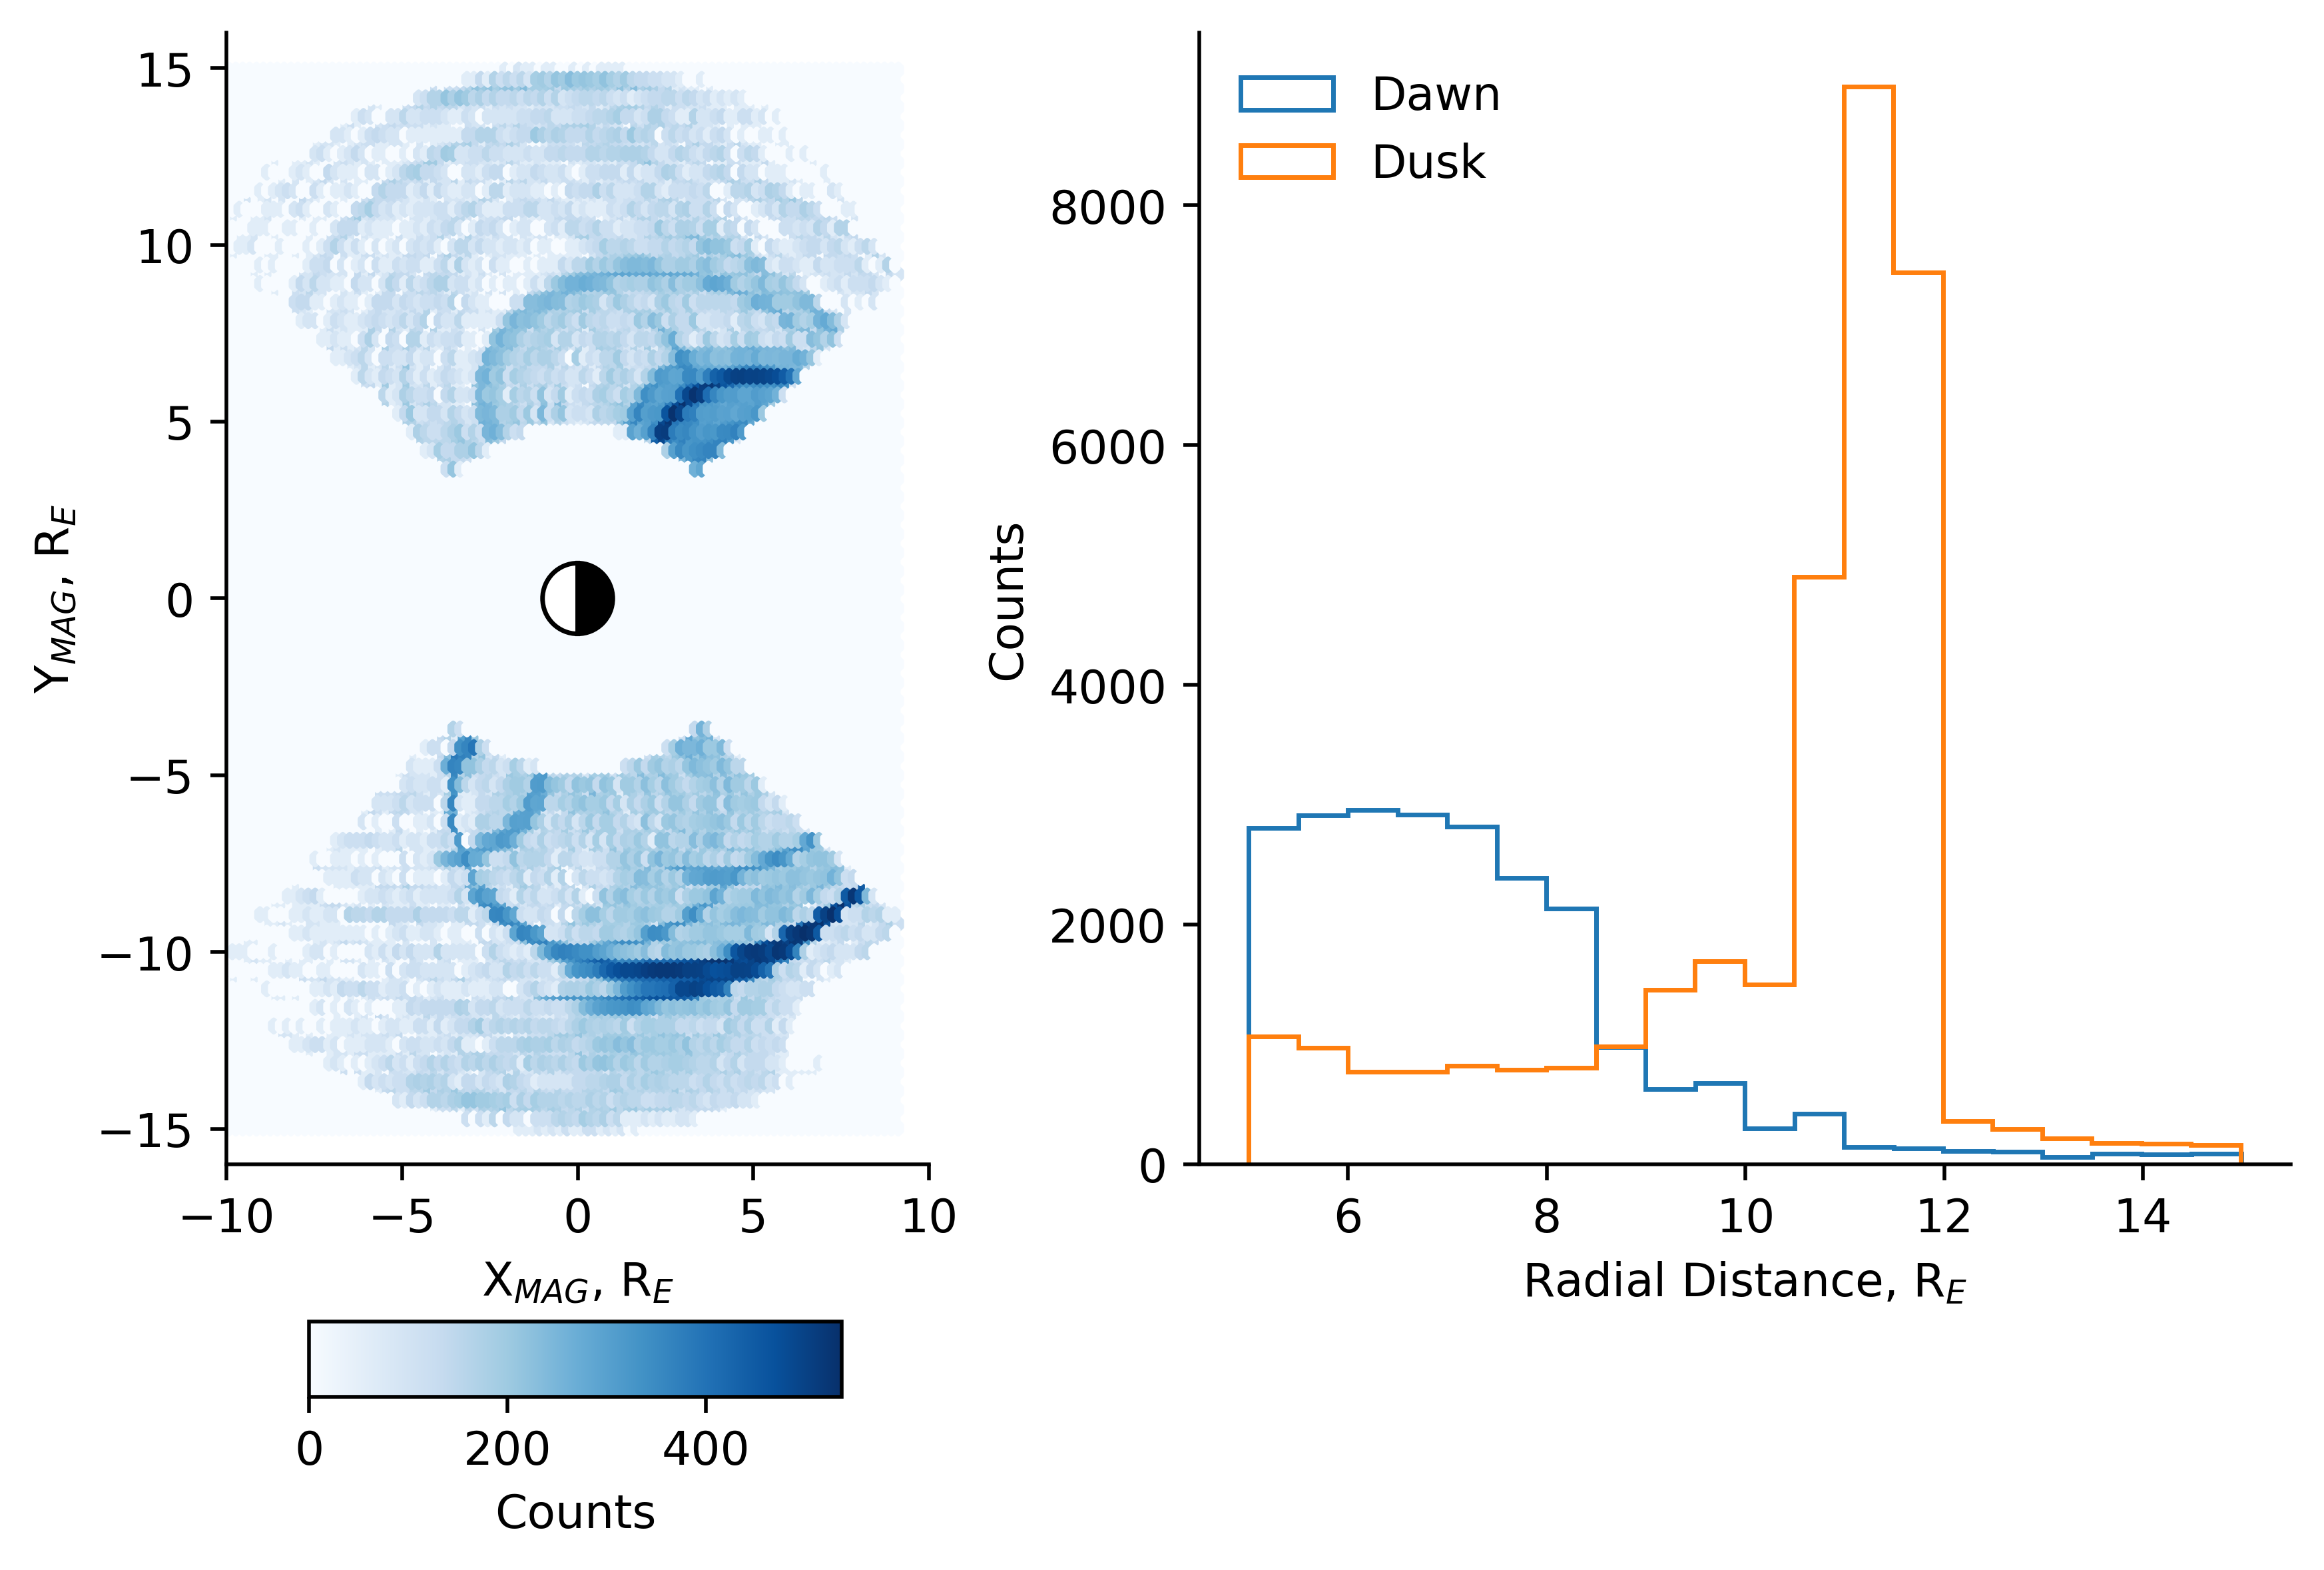

In [153]:
# Spatial distribution of data
fig = plt.figure(figsize=(8,4.5),dpi=500)
gs = mpl.gridspec.GridSpec(18,32)
ax1 = plt.subplot(gs[0:18,0:11])
ax2 = plt.subplot(gs[0:18,15:32])

hbp = ax1.hexbin(list(dawn_f2['pos_x_mag'].values)+
           list(dusk_f2['pos_x_mag'].values),
           list(dawn_f2['pos_y_mag'].values)+
           list(dusk_f2['pos_y_mag'].values),
           bins='log',cmap='Blues')

cmap = mpl.cm.get_cmap('Blues',len(dawn_f2)+len(dusk_f2))
norm = mpl.colors.Normalize(vmin=0, vmax=hbp.get_array().max())
cbaxes1 = fig.add_axes([0.156, -0.03, 0.2, 0.05]) 
cb1 = mpl.colorbar.ColorbarBase(cbaxes1, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')

ax1.add_artist(mpl.patches.Wedge((0,0),1,270,90,color='k'))
ax1.add_artist(mpl.patches.Wedge((0,0),1,90,270,color='w',ec='k'))

cb1.set_label('Counts')
ax1.set_ylabel('Y$_{MAG}$, R$_E$')
ax1.set_xlabel('X$_{MAG}$, R$_E$')
ax1.set_ylim(-16,16)
ax1.set_xlim(-10,10)
sbn.despine()

ax2.hist(dawn_f3['pos_r_mag'],bins=20,histtype='step',
         label='Dawn')
ax2.hist(dusk_f3['pos_r_mag'],bins=20,histtype='step',
         label='Dusk')


ax2.legend(loc='upper left',frameon=False)
ax2.set_ylabel('Counts')
ax2.set_xlabel('Radial Distance, R$_E$')

sbn.despine()

path = '/home/users/hf832176/My Documents/Coding/themis/Graphs/write_up/'
plt.savefig(fname = path+'data_coverage.pdf',format='pdf',bbox_inches='tight')
# plt.savefig(fname = path+'data_coverage.eps',format='eps',bbox_inches='tight')
plt.savefig(fname = path+'data_coverage.png',format='png',bbox_inches='tight')

plt.show()
# plt.close(fig)

In [118]:
# Plot of the radial dist. of median PSD
r_bins = np.linspace(5,15,10)
# print(r_bins)

r_def_da = [np.log10(dawn_f3[(dawn_f3['pos_r_mag'] > i) &
                          (dawn_f3['pos_r_mag'] < j)].iloc[:,71:]).median()
            for i,j in zip(r_bins[:-1],r_bins[1:])]

r_def_du = [np.log10(dusk_f3[(dusk_f3['pos_r_mag'] > i) &
                          (dusk_f3['pos_r_mag'] < j)].iloc[:,71:]).median()
            for i,j in zip(r_bins[:-1],r_bins[1:])]

#######

da_qu = [np.log10(dawn_f3[(dawn_f3['pos_r_mag'] > i) &
                          (dawn_f3['pos_r_mag'] < j)].iloc[:,71:]).quantile(0.90,axis=0)
            for i,j in zip(r_bins[:-1],r_bins[1:])]

da_ql = [np.log10(dawn_f3[(dawn_f3['pos_r_mag'] > i) &
                          (dawn_f3['pos_r_mag'] < j)].iloc[:,71:]).quantile(0.10,axis=0)
            for i,j in zip(r_bins[:-1],r_bins[1:])]

#######

du_qu = [np.log10(dusk_f3[(dusk_f3['pos_r_mag'] > i) &
                          (dusk_f3['pos_r_mag'] < j)].iloc[:,71:]).quantile(0.90,axis=0)
            for i,j in zip(r_bins[:-1],r_bins[1:])]

du_ql = [np.log10(dusk_f3[(dusk_f3['pos_r_mag'] > i) &
                          (dusk_f3['pos_r_mag'] < j)].iloc[:,71:]).quantile(0.10,axis=0)
            for i,j in zip(r_bins[:-1],r_bins[1:])]


# print(np.shape(r_def_da))

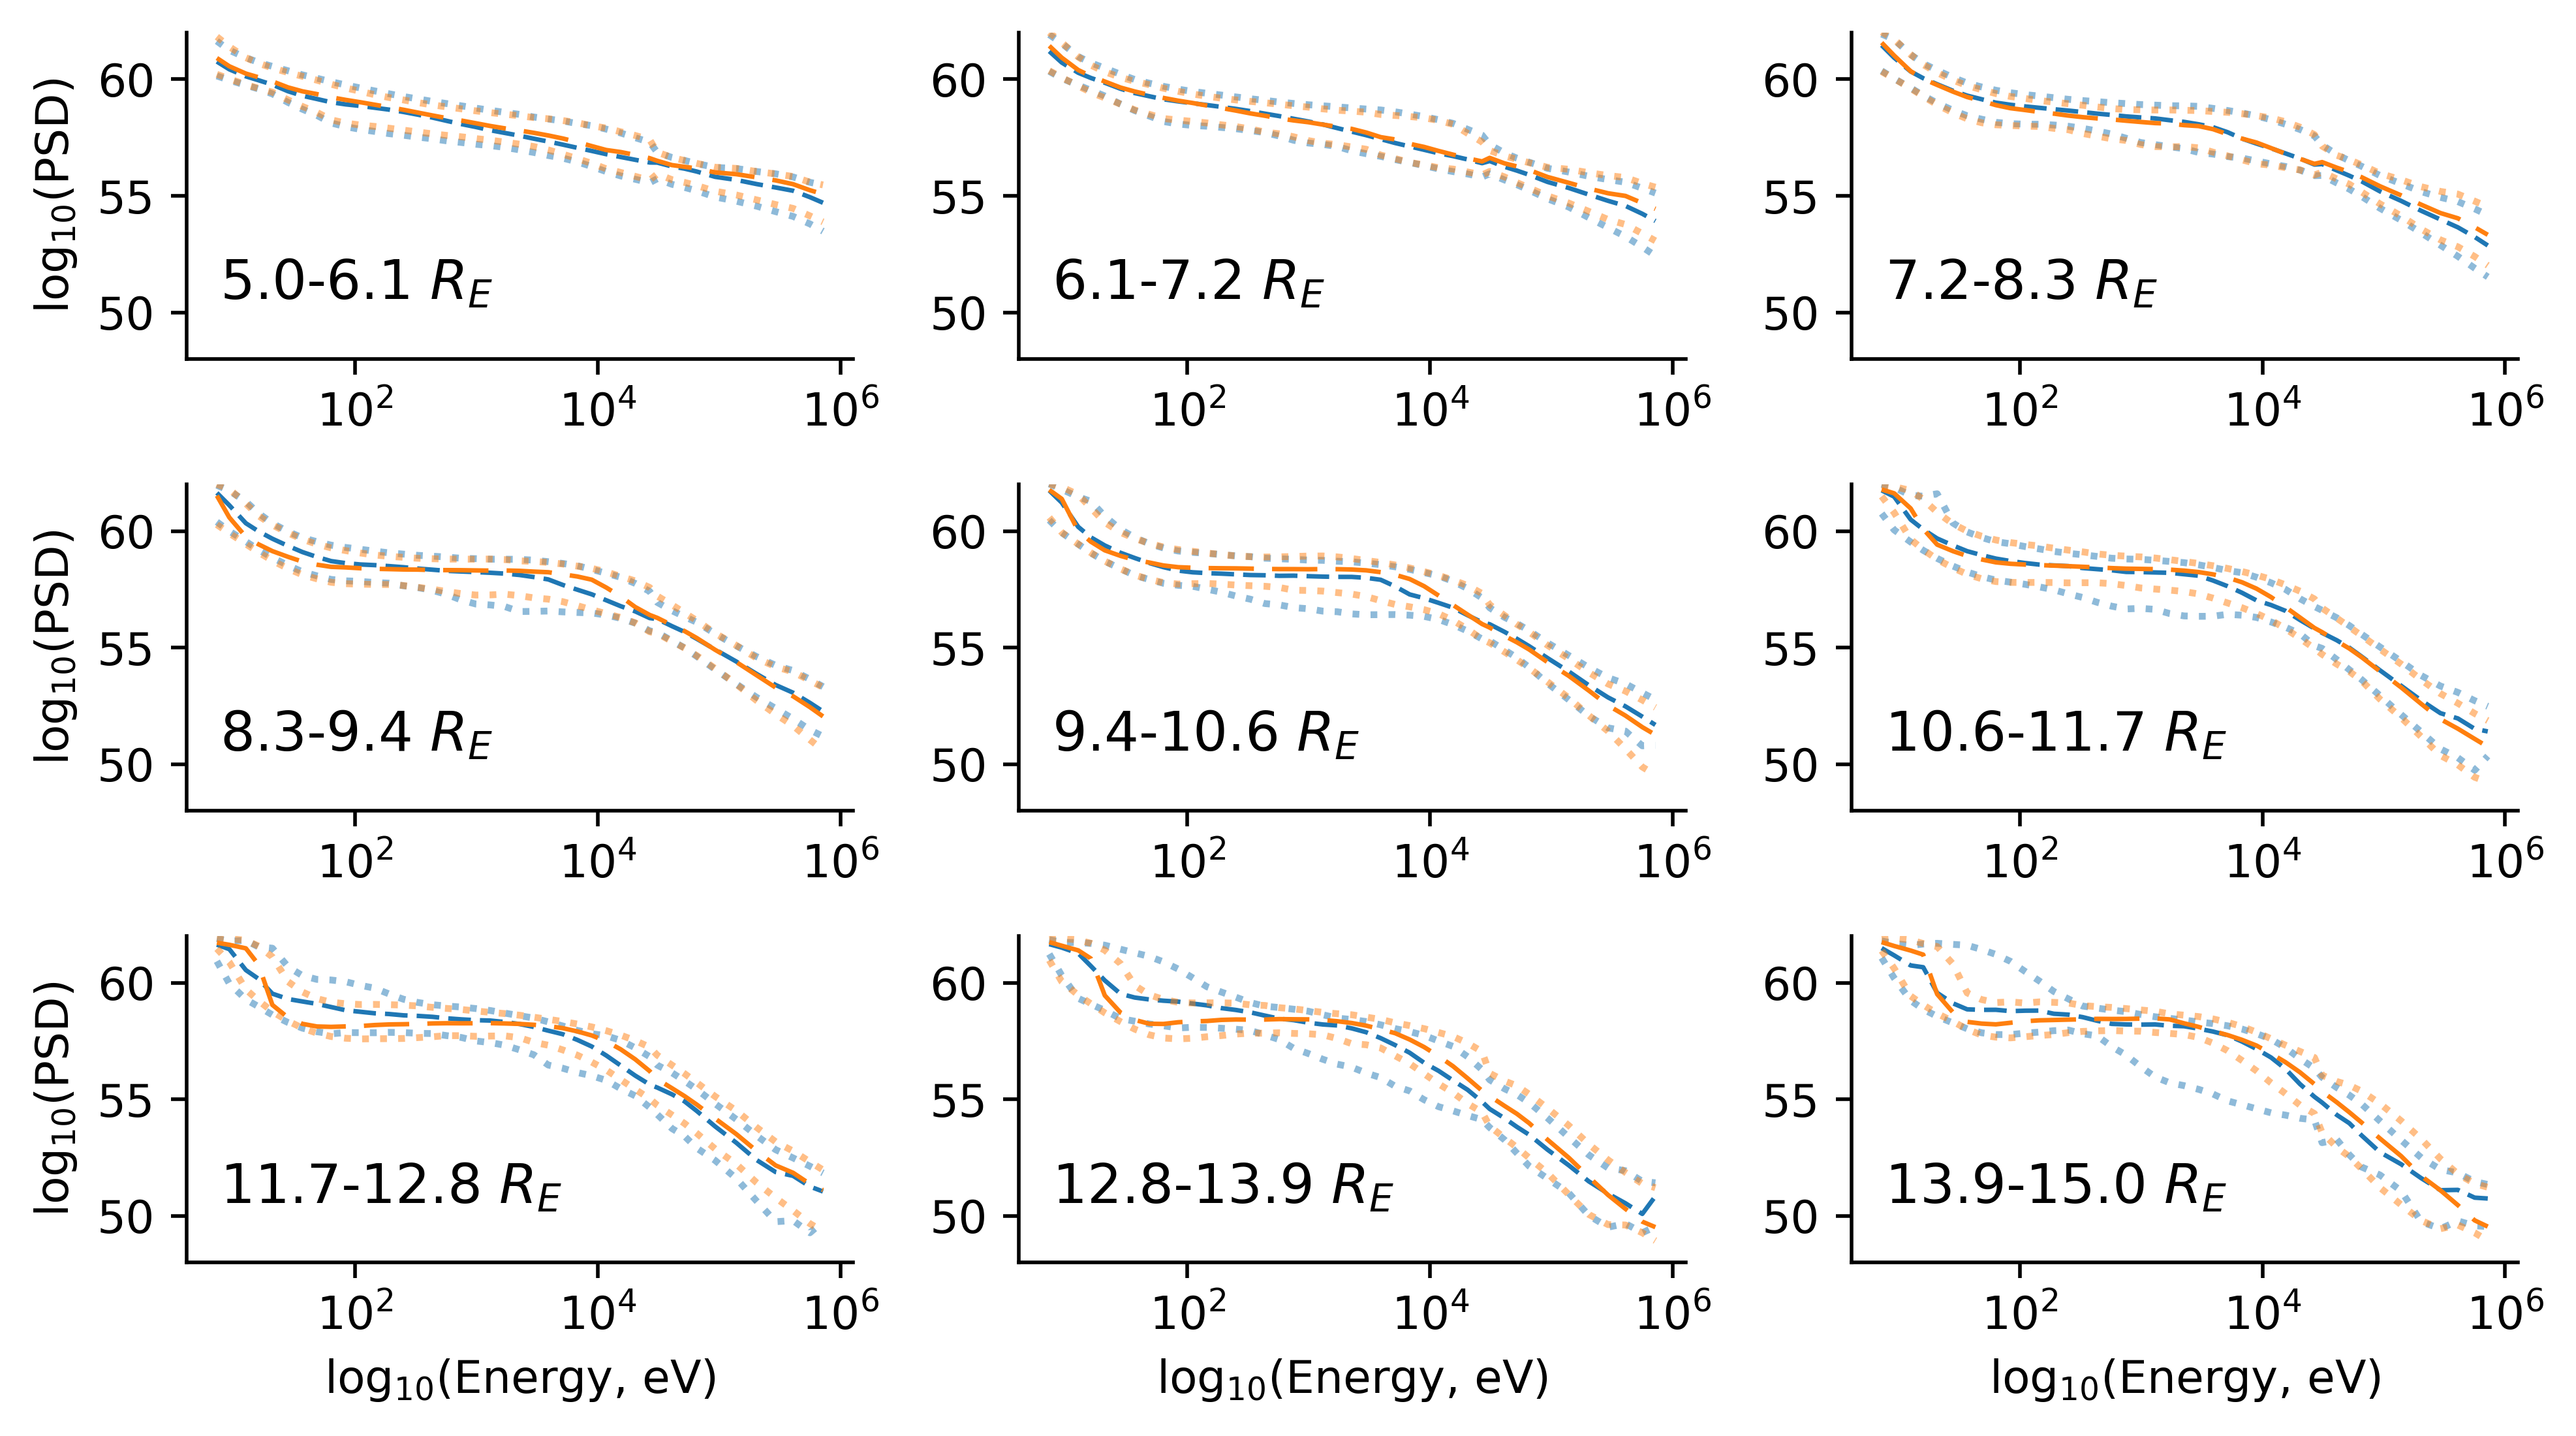

In [155]:
fig = plt.figure(figsize=(8,4.5),dpi=500)
axs = [plt.subplot(3,3,i+1) for i in range(9)]

# Plotting dawn medians
[i.plot(e_levs2,r_def_da[j],c='C0',linewidth=1,linestyle='--',dashes=(5,2))
 for i,j in zip(axs,range(9))]
[i.plot(e_levs2,da_ql[j],c='C0',linestyle=':',alpha=0.5) for i,j in zip(axs,range(9))]
[i.plot(e_levs2,da_qu[j],c='C0',linestyle=':',alpha=0.5) for i,j in zip(axs,range(9))]
# [i.fill_between(e_levs2,da_ql[j],da_qu[j],
#                 color='C0',alpha=0.25,edgecolor='C0',linestyle='--')
#  for i,j in zip(axs,range(9))]

# Plotting dusk medians
[i.plot(e_levs2,r_def_du[j],c='C1',linewidth=1,linestyle='--',dashes=(10,4))
 for i,j in zip(axs,range(9))]
[i.plot(e_levs2,du_ql[j],c='C1',linestyle=':',alpha=0.5) for i,j in zip(axs,range(9))]
[i.plot(e_levs2,du_qu[j],c='C1',linestyle=':',alpha=0.5) for i,j in zip(axs,range(9))]
# [i.fill_between(e_levs2,du_ql[j],du_qu[j],
#                 color='C1',alpha=0.35,edgecolor='C0',linestyle='--')
#  for i,j in zip(axs,range(9))]

[i.set_ylim(48,62) for i in axs]
[i.set_xscale('log') for i in axs]
[i.set_title(str(j)+'-'+str(k)+' $R_E$',position=(0.05,0.1),loc='left')
 for i,j,k in zip(axs,np.around(r_bins[:-1],1),np.around(r_bins[1:],1))]
[i.set_ylabel('log$_{10}$(PSD)') for i in axs[::3]]
[i.set_xlabel('log$_{10}$(Energy, eV)') for i in axs[-3:]]

sbn.despine()
plt.tight_layout()

path = '/home/users/hf832176/My Documents/Coding/themis/Graphs/write_up/'
plt.savefig(fname = path+'PSDvE_bin_avg.pdf',format='pdf',bbox_inches='tight')
# plt.savefig(fname = path+'PSDvE_bin_avg.eps',format='eps',bbox_inches='tight')
plt.savefig(fname = path+'PSDvE_bin_avg.png',format='png',bbox_inches='tight')

plt.show()
# plt.close(fig)

In [50]:
# # HB plot of the all PSD per dawn radial bin
# r_bins = np.linspace(5,15,10)

# r_def_da = [np.log10(dawn_f2[(dawn_f2['pos_r_mag'] > i) &
#                           (dawn_f2['pos_r_mag'] < j)].iloc[:,71:].replace(0,np.nan))
#             for i,j in zip(r_bins[:-1],r_bins[1:])]

# r_def_du = [np.log10(dusk_f2[(dusk_f2['pos_r_mag'] > i) &
#                           (dusk_f2['pos_r_mag'] < j)].iloc[:,71:].replace(0,np.nan))
#             for i,j in zip(r_bins[:-1],r_bins[1:])]


# fig = plt.figure(figsize=(10,10),dpi=500)
# axs = [plt.subplot(3,3,i) for i in range(1,10)]

# for i in range(9):
#     hb_fmt = [[r_def_da[i].iloc[:,k].dropna().values,
#                [l for j in range(len(r_def_da[i].iloc[:,k].dropna()))]]
#               for k,l in zip(range(len(e_levs2)),np.log10(e_levs2))]
#     hb_fmt = np.array(hb_fmt)
    
#     yvals = [j for i in hb_fmt[:,0] for j in i]
#     xvals = [j for i in hb_fmt[:,1] for j in i]
    
#     axs[i].hist2d(xvals,yvals,bins=((len(e_levs2)),100),cmap='Blues',norm=mpl.colors.LogNorm())

# [axs[i].set_title('Radial Distance: '+"{:2.1f}".format(r_bins[i])+'R$_E$')
#  for i in range(9)]
# [axs[i].set_ylim(48,63)
#  for i in range(9)]

# axs[0].set_ylabel('Log$_{10}$(PSD)')
# axs[3].set_ylabel('Log$_{10}$(PSD)')
# axs[6].set_ylabel('Log$_{10}$(PSD)')

# axs[6].set_xlabel('Log$_{10}$(Energy)')
# axs[7].set_xlabel('Log$_{10}$(Energy)')
# axs[8].set_xlabel('Log$_{10}$(Energy)')

# plt.tight_layout()
# sbn.despine()

# path = '/home/users/hf832176/My Documents/Coding/themis/Graphs/mag_psd_esa/'
# plt.savefig(fname = path+'PSDvE_bin_hb_da.pdf',format='pdf',bbox_inches='tight')
# plt.savefig(fname = path+'PSDvE_bin_hb_da.eps',format='eps',bbox_inches='tight')
# plt.savefig(fname = path+'PSDvE_bin_hb_da.png',format='png',bbox_inches='tight')

# # plt.show()
# plt.close(fig)

In [51]:
# # HB plot of the all PSD per dusk radial bin
# fig = plt.figure(figsize=(10,10),dpi=500)
# axs = [plt.subplot(3,3,i) for i in range(1,10)]

# for i in range(9):
#     hb_fmt = [[r_def_du[i].iloc[:,k].dropna().values,
#                [l for j in range(len(r_def_du[i].iloc[:,k].dropna()))]]
#               for k,l in zip(range(len(e_levs2)),np.log10(e_levs2))]
#     hb_fmt = np.array(hb_fmt)
    
#     yvals = [j for i in hb_fmt[:,0] for j in i]
#     xvals = [j for i in hb_fmt[:,1] for j in i]
    
#     axs[i].hist2d(xvals,yvals,bins=((len(e_levs2)),100),cmap='Blues',norm=mpl.colors.LogNorm())

# [axs[i].set_title('Radial Distance: '+"{:2.1f}".format(r_bins[i])+'R$_E$')
#  for i in range(9)]
# [axs[i].set_ylim(48,63)
#  for i in range(9)]

# axs[0].set_ylabel('Log$_{10}$(PSD)')
# axs[3].set_ylabel('Log$_{10}$(PSD)')
# axs[6].set_ylabel('Log$_{10}$(PSD)')

# axs[6].set_xlabel('Log$_{10}$(Energy)')
# axs[7].set_xlabel('Log$_{10}$(Energy)')
# axs[8].set_xlabel('Log$_{10}$(Energy)')

# plt.tight_layout()
# sbn.despine()

# path = '/home/users/hf832176/My Documents/Coding/themis/Graphs/mag_psd_esa/'
# plt.savefig(fname = path+'PSDvE_bin_hb_du.pdf',format='pdf',bbox_inches='tight')
# plt.savefig(fname = path+'PSDvE_bin_hb_du.eps',format='eps',bbox_inches='tight')
# plt.savefig(fname = path+'PSDvE_bin_hb_du.png',format='png',bbox_inches='tight')

# # plt.show()
# plt.close(fig)

In [55]:
EvR_da.columns

Index(['pos_r_mag', 'E_11_psd'], dtype='object')

In [54]:
#  AVG PSD v R for energy bins
r_bins = np.linspace(5,15,101)

fig = plt.figure(figsize=(14,3.5),dpi=500)
axs = [plt.subplot(1,2,i) for i in range(1,3)]

cmap = mpl.cm.get_cmap('viridis',len(e_levs2))
norm = mpl.colors.Normalize(np.log10(e_levs2).min(), np.log10(e_levs2).max())
cbaxes1 = fig.add_axes([0.25, -0.07, 0.5, 0.05]) 
cb1 = mpl.colorbar.ColorbarBase(cbaxes1, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label('Log$_{10}$(Energy)')

for k in range(len(e_levs2)):
    EvR_da = dawn_f2.iloc[:,[67,71+k]].replace(0,np.nan).dropna()
    EvR_du = dusk_f2.iloc[:,[67,71+k]].replace(0,np.nan).dropna()
    
    r_bin_da = [np.log10(EvR_da[(EvR_da['pos_r_mag'] > i) &
                          (EvR_da['pos_r_mag'] < j)].iloc[:,1]).median()
            for i,j in zip(r_bins[:-1],r_bins[1:])]
    
    r_bin_du = [np.log10(EvR_du[(EvR_du['pos_r_mag'] > i) &
                          (EvR_du['pos_r_mag'] < j)].iloc[:,1]).median()
            for i,j in zip(r_bins[:-1],r_bins[1:])]
    
    
    axs[0].plot(r_bins[:-1],r_bin_da,c=cmap(k))
    axs[1].plot(r_bins[:-1],r_bin_du,c=cmap(k))
    
[i.set_ylim(48,63) for i in axs]
[i.set_xlabel('Radial Distance, R$_E$') for i in axs]
axs[0].set_ylabel('Log$_{10}$(PSD)')
axs[0].set_title('Dawn')
axs[1].set_title('Dusk')

sbn.despine()

path = '/home/users/hf832176/My Documents/Coding/themis/Graphs/mag_psd_esa/'
plt.savefig(fname = path+'PSDvR_bin_avg.pdf',format='pdf',bbox_inches='tight')
plt.savefig(fname = path+'PSDvR_bin_avg.eps',format='eps',bbox_inches='tight')
plt.savefig(fname = path+'PSDvR_bin_avg.png',format='png',bbox_inches='tight')

# plt.show()
plt.close(fig)

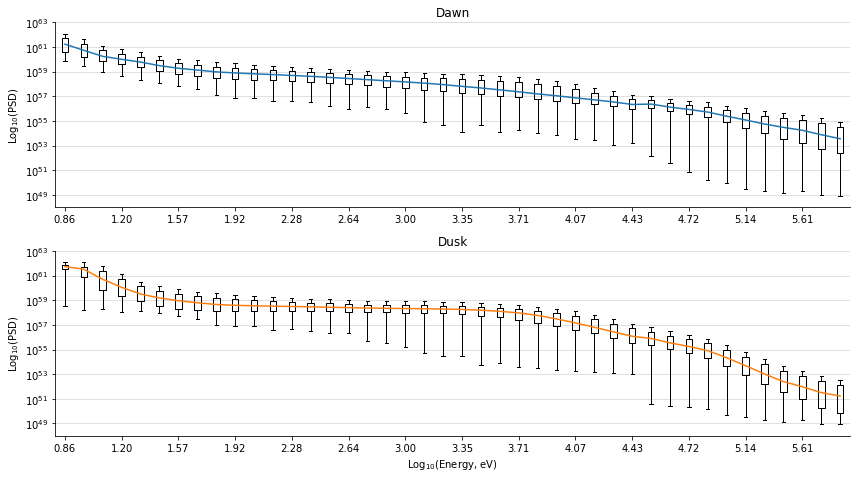

In [156]:
# Plotting boxplots of log10(DEF) for all energies.
plt.figure(figsize=(12,4.5*1.5))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

medianprops = dict(linewidth=0)
ax1.boxplot(dawn_f3.iloc[:,71:].values,widths=0.35,sym='',
            medianprops=medianprops)
ax1.plot(np.arange(1,43,1),dawn_f3.iloc[:,71:].median())

ax1.grid(axis='y',alpha=0.5)

ax1.set_title('Dawn')
ax1.set_ylabel('Log$_{10}$(PSD)')
# plt.xlabel('Log$_{10}$(Energy)')
ax1.set_xticks(np.arange(1,43,3))
ax1.set_xticklabels(["{0:.2f}".format(i) for i in np.log10(e_levs2[::3])])
ax1.set_ylim(1e+48,1e+63)
ax1.set_yscale('log')

#######

ax2.boxplot(dusk_f3.iloc[:,71:].values,widths=0.35,sym='',
            medianprops=medianprops)
ax2.plot(np.arange(1,43,1),dusk_f3.iloc[:,71:].median(),c='C1')

ax2.grid(axis='y',alpha=0.5)

ax2.set_title('Dusk')
ax2.set_ylabel('Log$_{10}$(PSD)')
ax2.set_xlabel('Log$_{10}$(Energy, eV)')
ax2.set_xticks(np.arange(1,43,3))
ax2.set_xticklabels(["{0:.2f}".format(i) for i in np.log10(e_levs2[::3])])
ax2.set_ylim(1e+48,1e+63)
ax2.set_yscale('log')

plt.tight_layout()
sbn.despine()

path = '/home/users/hf832176/My Documents/Coding/themis/Graphs/write_up/'
plt.savefig(fname = path+'PSDvE_dd_avg.pdf',format='pdf',bbox_inches='tight')
# plt.savefig(fname = path+'PSDvE_dd_avg.eps',format='eps',bbox_inches='tight')
plt.savefig(fname = path+'PSDvE_dd_avg.png',format='png',bbox_inches='tight')

plt.show()

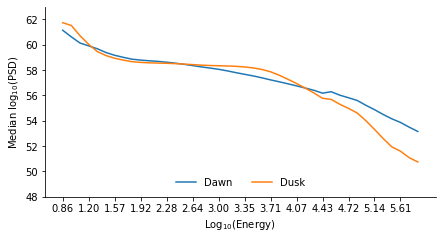

In [63]:
# Plot of median DEF per energy channel
plt.figure(figsize=(7,3.5))

plt.plot([i for i in range(len(e_levs2))],
        [np.log10(dawn_f2[i].median()) for i in dawn_f2.columns[71:]],
        label='Dawn')
plt.plot([i for i in range(len(e_levs2))],
        [np.log10(dusk_f2[i].median()) for i in dusk_f2.columns[71:]],
        label='Dusk')

plt.legend(loc='lower center',ncol=2,frameon=False)
plt.ylabel('Median log$_{10}$(PSD)')
plt.xlabel('Log$_{10}$(Energy)')

plt.ylim(48,63)
tick_l = ["{0:.2f}".format(i) for i in np.log10(e_levs2)]
t_loc = [i for i in range(len(e_levs2))]
plt.xticks(ticks=t_loc[::3],labels=tick_l[::3])
sbn.despine()
plt.show()

# <center> Kolmogorov-Smirnov Statistic </center>

In [28]:
from scipy.stats import ks_2samp as kss

In [29]:
# Critical KS stat at the p={0.05,0.001} level
ks_crit5 = 1.36*np.sqrt(2*len(dusk_f3)/(len(dusk_f3)**2))
ks_crit01 = 1.95*np.sqrt(2*len(dusk_f3)/(len(dusk_f3)**2))
print(ks_crit5,ks_crit01)

# If stat > critical value then distributions are different.

0.010380772071694595 0.01488419524985622


In [30]:
ks_df = pd.DataFrame(index = [i for i in dusk_f3.columns[71:]],
                     columns=['stat','p-val'])

ks_df['stat'] = [kss(dusk_f3[i],dawn_f3[i])[0] for i in dusk_f3.columns[71:]]
ks_df['p-val'] = [kss(dusk_f3[i],dawn_f3[i])[1] for i in dusk_f3.columns[71:]]
ks_df['p-val'] = ['<1e-10' if i < 1e-10 else i for i in ks_df['p-val']]
# ks_df

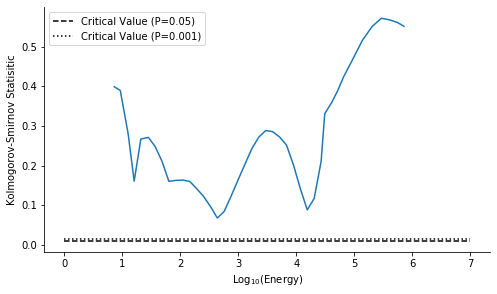

In [31]:
plt.figure(figsize=(8,4.5))
plt.plot([np.log10(i) for i in e_levs2],ks_df.stat)
plt.plot([0,7],[ks_crit5,ks_crit5],'k--',label='Critical Value (P=0.05)')
plt.plot([0,7],[ks_crit01,ks_crit01],'k:',label='Critical Value (P=0.001)')

plt.ylabel('Kolmogorov-Smirnov Statisitic')
plt.xlabel('Log$_{10}$(Energy)')
plt.legend()
sbn.despine()
plt.show()

# <center> Anderson-Darlin Test </center>

In [32]:
from scipy.stats import anderson_ksamp as adt

In [35]:
# AD stat critical values for
# P={0.25,0.10,0.05,0.025,0.01,0.005,0.001}

AD_crit = adt([dusk_f3.iloc[:,71],
               dawn_f3.iloc[:,71]])[1]

# If AD stat > crit value, different dists

<ipython-input-35-7ddbf04084f6>:4: UserWarning: p-value floored: true value smaller than 0.001
  AD_crit = adt([dusk_f3.iloc[:,71],


In [36]:
ad_df = pd.DataFrame(index = [i for i in dusk_f3.columns[71:]],
                     columns=['stat','p-val'])

ad_df['stat'] = [adt([dusk_f3[i],dawn_f3[i]])[0] for i in dusk_f3.columns[71:]]
# ad_df['crit val'] = [adt([dawn[i],dusk[i]])[1] for i in dusk.columns[0:11]]
ad_df['p-val'] = [adt([dusk_f3[i],dawn_f3[i]])[2] for i in dusk_f3.columns[71:]]
ad_df['p-val'] = ['<1e-10' if i < 1e-10 else i for i in ad_df['p-val']]
# ad_df

<ipython-input-36-701060fc8cf3>:4: UserWarning: p-value floored: true value smaller than 0.001
  ad_df['stat'] = [adt([dusk_f3[i],dawn_f3[i]])[0] for i in dusk_f3.columns[71:]]
<ipython-input-36-701060fc8cf3>:6: UserWarning: p-value floored: true value smaller than 0.001
  ad_df['p-val'] = [adt([dusk_f3[i],dawn_f3[i]])[2] for i in dusk_f3.columns[71:]]


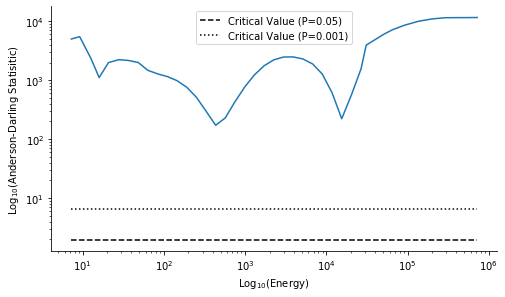

In [45]:
plt.figure(figsize=(8,4.5))
plt.plot(e_levs2,ad_df.stat)

xlims = [min(e_levs2),max(e_levs2)]
plt.plot(xlims,[AD_crit[2],AD_crit[2]],'k--',label='Critical Value (P=0.05)')
plt.plot(xlims,[AD_crit[-1],AD_crit[-1]],'k:',label='Critical Value (P=0.001)')

plt.ylabel('Log$_{10}$(Anderson-Darling Statisitic)')
plt.xlabel('Log$_{10}$(Energy)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
sbn.despine()
plt.show()